In [5]:
!pip install miptlabs

You should consider upgrading via the 'c:\users\dmitry\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [117]:
import os
import miptlabs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pprint import pprint

%matplotlib inline

In [95]:
raw = []
names = []

for file_name in os.listdir():
    if file_name.endswith(".csv"):
        raw.append(pd.read_csv(file_name, index_col=0))
        names.append(file_name[:-4])
        raw[-1]['best'] /= 1000
        raw[-1]['average'] /= 1000
        raw[-1]['worst'] /= 1000
pprint(data)

        best  average  worst
number                      
5        808      935    863
10       931     1377   1164
15      1015     1782   1678
20      1099     2504   1724
25      1252     3545   2175
30      1325     4559   2231
35      1937     5521   2253
40      2264     6168   3332
45      2361     7069   3634
50      2932     7957   4484
55      2859     8493   4344
60      2897    10611   5191
65      3392    12077   5439
70      4543    13551   7073
75      4957    13860   5884
80      4630    15320   8646
85      5450    15952   7623
90      5782    17197   8697
95      5597    17192   8030
100     5821    19106   9060


In [96]:
print(raw)

[          best  average    worst
number                          
5        0.472    0.626    0.679
10       1.132    1.853    2.360
15       2.446    5.859    5.960
20       3.288    6.369    8.039
25       5.037    9.908   12.474
30       6.391   13.190   15.952
35       8.477   17.661   23.487
40      11.925   24.001   29.124
45      14.028   29.015   37.713
50      20.735   38.931   45.564
55      22.093   49.540   58.303
60      24.876   53.816   66.679
65      31.504   61.254   76.511
70      32.446   71.026   87.662
75      39.014   78.242  103.136
80      41.284   89.435  114.102
85      46.969  100.521  126.137
90      54.044  113.367  143.844
95      59.463  126.628  158.321
100     65.379  137.622  174.295,           best  average   worst
number                         
5        4.745    4.455   4.574
10       8.207    8.744   7.703
15      11.643   12.198  12.097
20      15.394   15.522  16.832
25      19.836   19.938  20.091
30      22.939   23.263  23.518
35      28.845  

<ipython-input-137-ccc720347df0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()
<ipython-input-137-ccc720347df0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()
<ipython-input-137-ccc720347df0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()
<ipython-input-137-ccc720347df0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


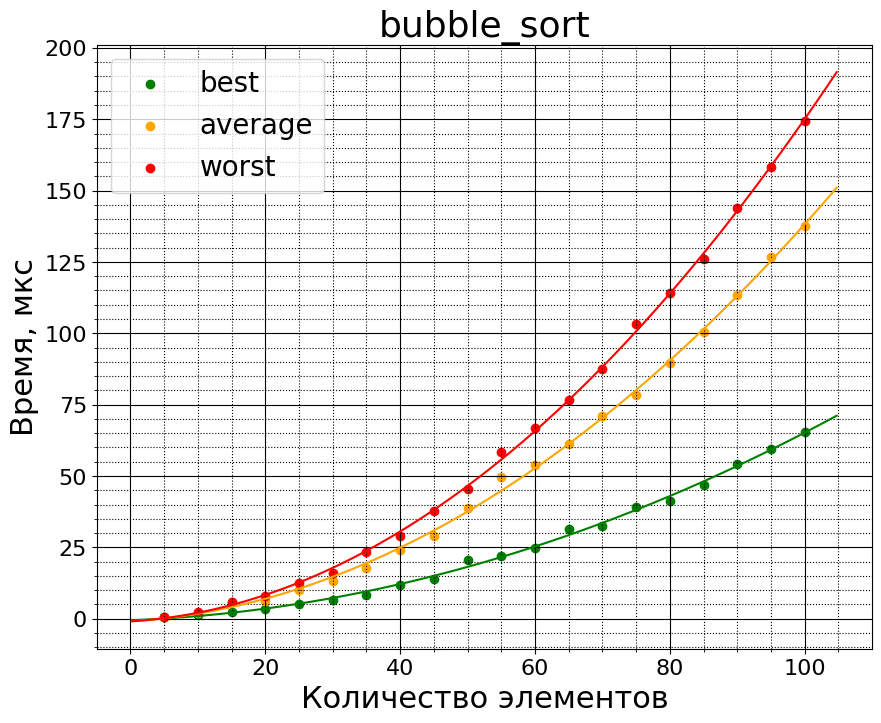

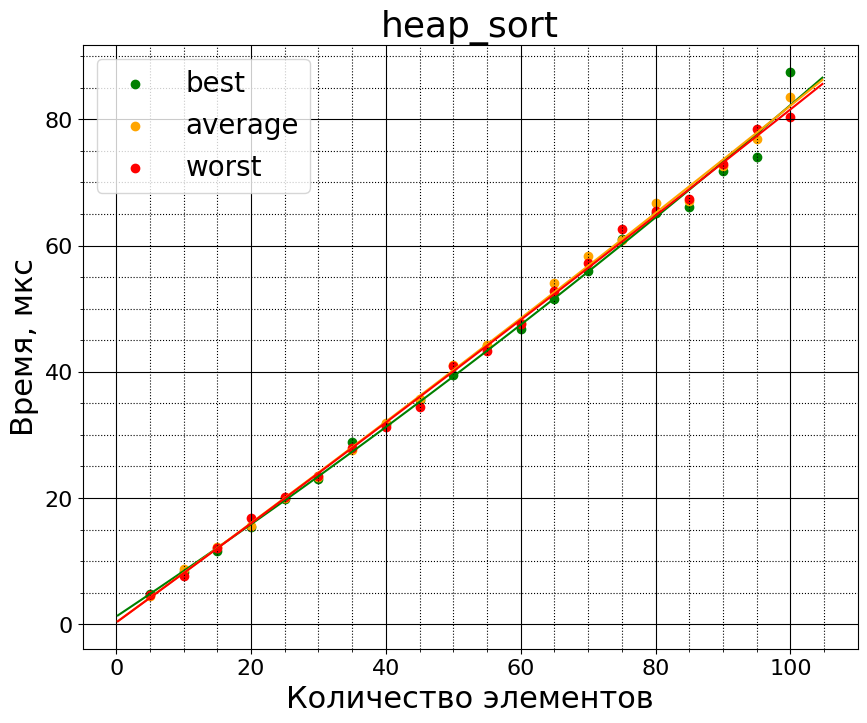

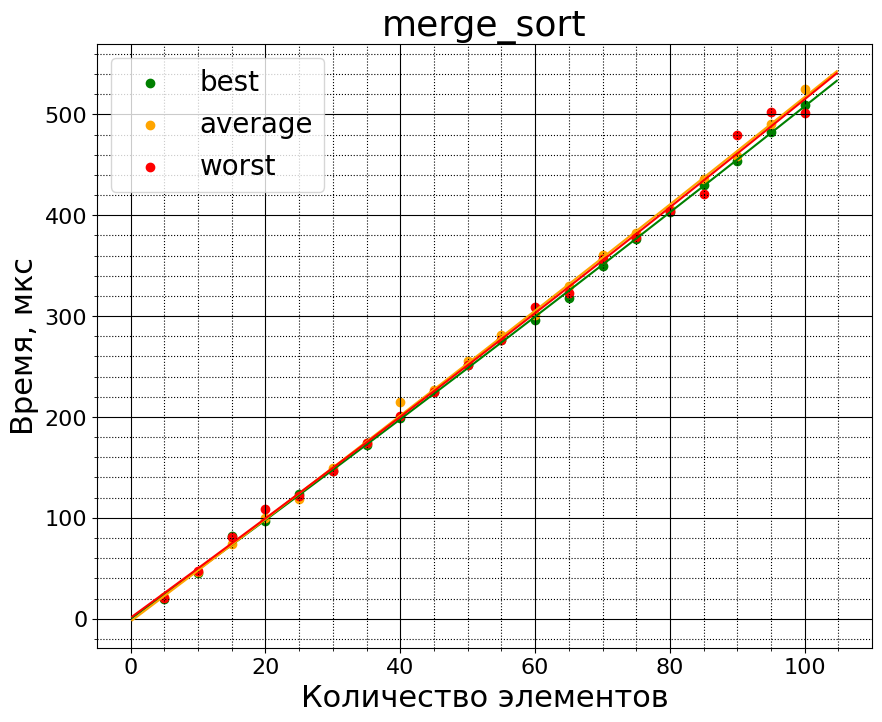

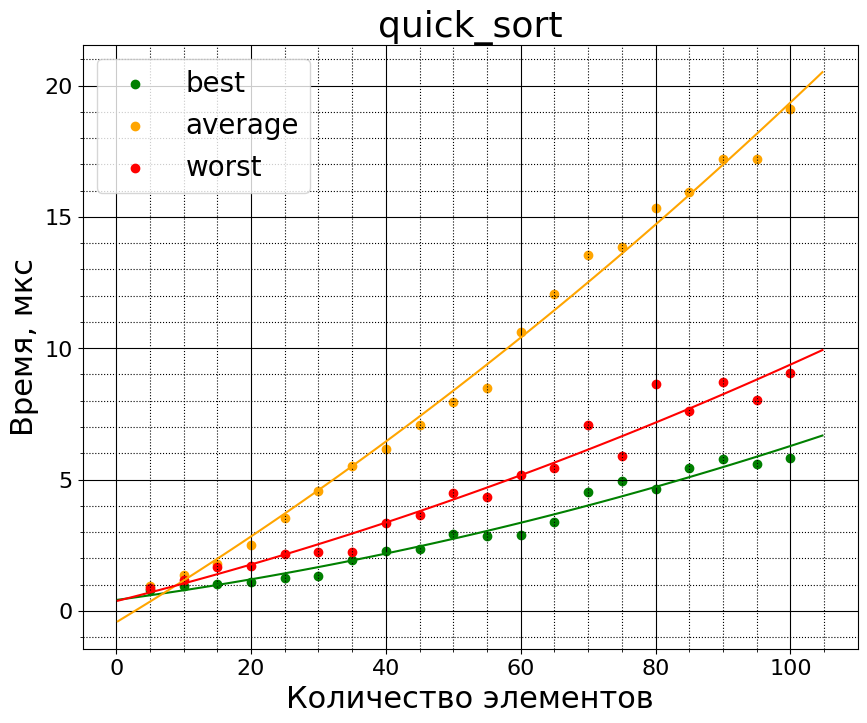

In [137]:
# Лучший, худший, средний

x = list(range(5, 105, 5))
apr = miptlabs.approximators.Polynomial(2)
for data, name in zip(raw, names):
    
    best = data['best']
    average = data['average']
    worst = data['worst']
    
    ax = miptlabs.plotter.pretty_plot(x, best, color='green', legend='best')
    x_, y_ = apr.approximate(x, best)
    ax.plot(x_, y_, color='green')
    
    
    ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, color='orange', legend='average')
    x_, y_ = apr.approximate(x, average)
    ax.plot(x_, y_, color='orange')
    
    
    x_, y_ = apr.approximate(x, worst)
    ax.plot(x_, y_, color='red')
    ax = miptlabs.plotter.pretty_plot(x, worst, axes=ax, title=name, color='red', legend='worst',
                                      xlabel='Количество элементов',
                                      ylabel='Время, мкс'
                                     )
    ax.figure.savefig(f'images/{name}.png')
    ax.figure.show()

c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
<ipython-input-138-becf270d6530>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\a

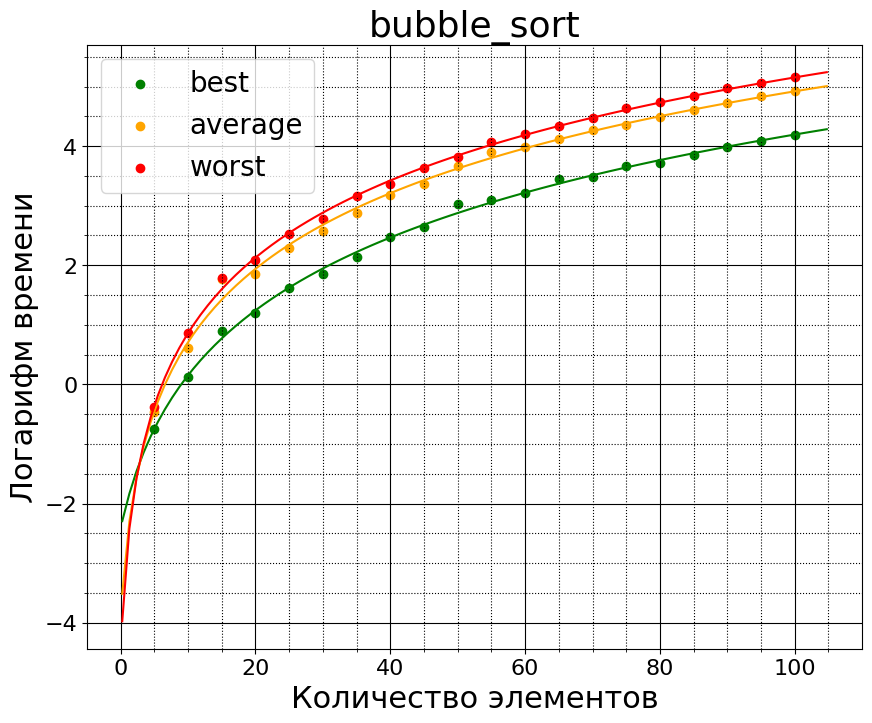

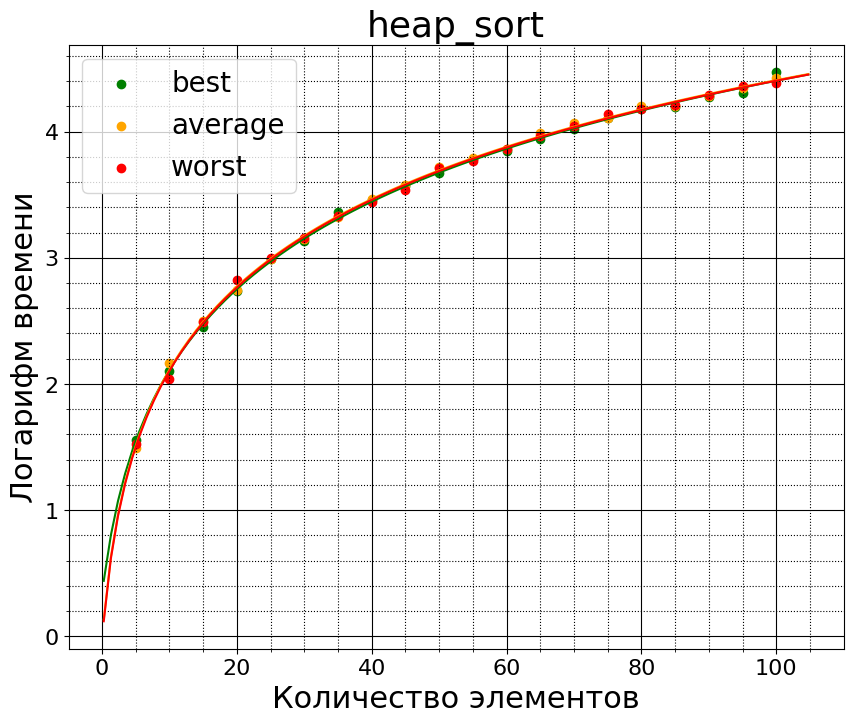

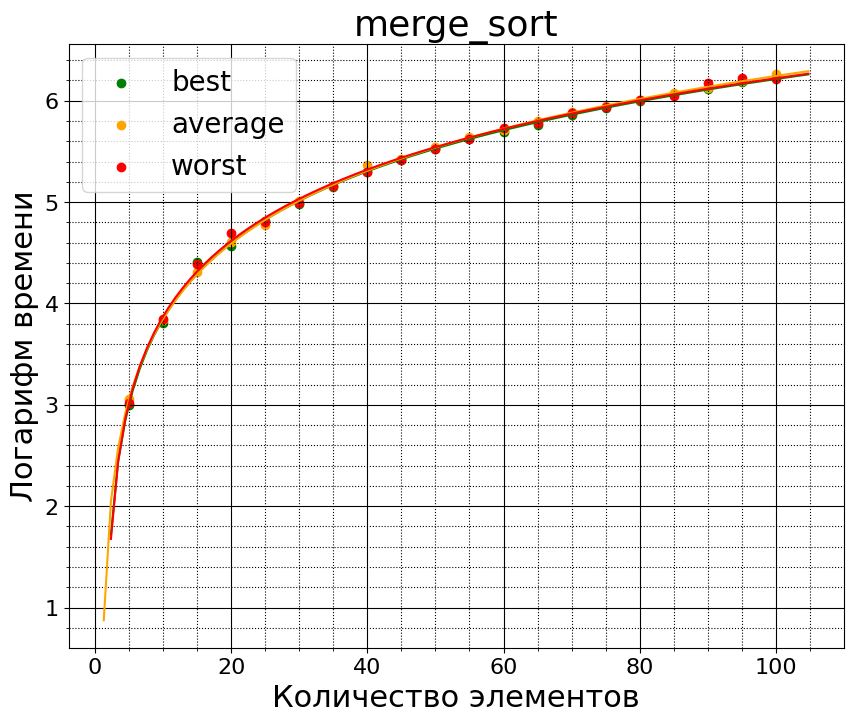

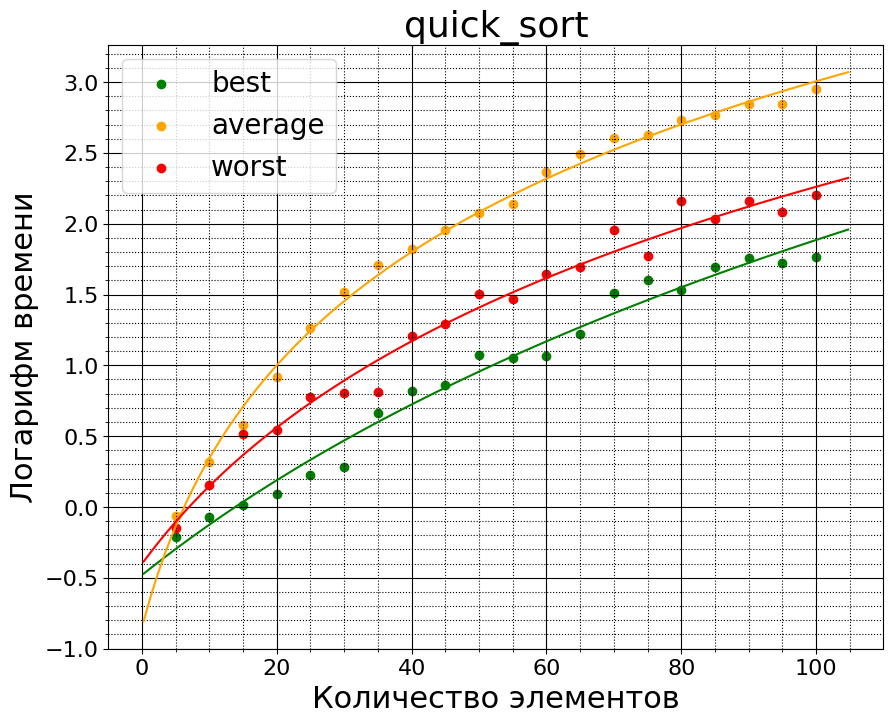

In [138]:
# ЛОГАРИФМ Лучший, худший, средний

x = np.array(list(range(5, 105, 5)))
apr = miptlabs.approximators.Logarithmic()
for data, name in zip(raw, names):
    
    best = np.log(data['best'])
    average = np.log(data['average'])
    worst = np.log(data['worst'])
    
    ax = miptlabs.plotter.pretty_plot(x, best, color='green', legend='best')
    x_, y_ = apr.approximate(x, best)
    ax.plot(x_, y_, color='green')
    
    
    ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, color='orange', legend='average')
    x_, y_ = apr.approximate(x, average)
    ax.plot(x_, y_, color='orange')
    
    
    x_, y_ = apr.approximate(x, worst)
    ax.plot(x_, y_, color='red')
    ax = miptlabs.plotter.pretty_plot(x, worst, axes=ax, title=name, color='red', legend='worst',
                                      xlabel='Количество элементов',
                                      ylabel='Логарифм времени'
                                     )
    ax.figure.savefig(f'images/ln_{name}.png')
    ax.figure.show()

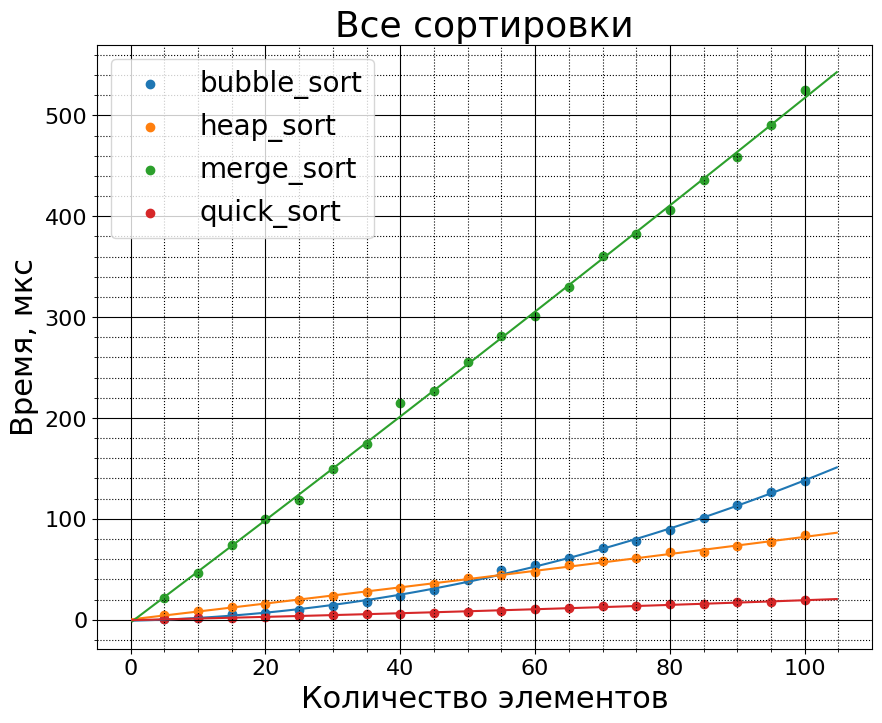

In [139]:
# ЛОГАРИФМ Лучший, худший, средний

x = np.array(list(range(5, 105, 5)))
apr = miptlabs.approximators.Polynomial(2)

ax = None

def _get_default_color():
    """
    :return: первый цвет в цикле цветов matplotlib, точнее тускло-синий
    """
    i = 0
    while True:
        yield plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10]
        i += 1
colorist = _get_default_color()
        
for data, name in zip(raw, names):
    
    best = data['best']
    average = data['average']
    worst = data['worst']
    
#     ax = miptlabs.plotter.pretty_plot(x, best, color='green', legend='best')
#     x_, y_ = apr.approximate(x, best)
#     ax.plot(x_, y_, color='green')
    
    
#     ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, color='orange', legend='average')
#     x_, y_ = apr.approximate(x, average)
#     ax.plot(x_, y_, color='orange')
    
    color=next(colorist)
    
    ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, title='Все сортировки', legend=name,
                                      xlabel='Количество элементов',
                                      ylabel='Время, мкс',
                                      color=color
                                     )
    x_, y_ = apr.approximate(x, average)
    ax.plot(x_, y_, color=color)
    
ax.figure.savefig(f'images/all.png')
# ax.figure.show()

c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:21: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d
c:\users\dmitry\appdata\local\programs\python\python39\lib\site-packages\miptlabs\approximators\functions.py:16: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c) + d


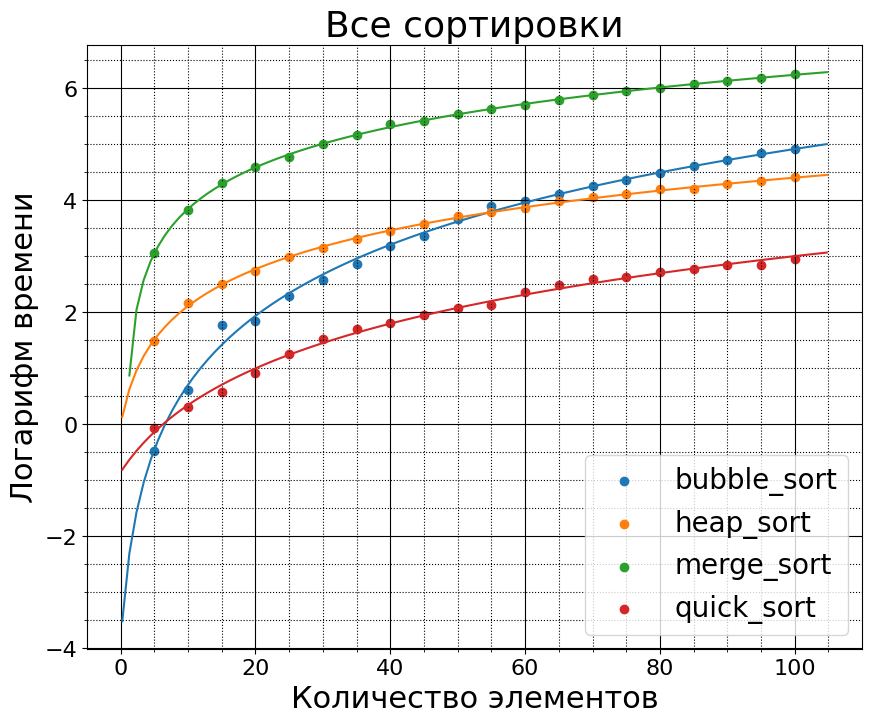

In [140]:
# ЛОГАРИФМ Лучший, худший, средний

x = np.array(list(range(5, 105, 5)))
apr = miptlabs.approximators.Logarithmic()

ax = None

def _get_default_color():
    """
    :return: первый цвет в цикле цветов matplotlib, точнее тускло-синий
    """
    i = 0
    while True:
        yield plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10]
        i += 1
colorist = _get_default_color()
        
for data, name in zip(raw, names):
    
    best = data['best']
    average = np.log(data['average'])
    worst = data['worst']
    
#     ax = miptlabs.plotter.pretty_plot(x, best, color='green', legend='best')
#     x_, y_ = apr.approximate(x, best)
#     ax.plot(x_, y_, color='green')
    
    
#     ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, color='orange', legend='average')
#     x_, y_ = apr.approximate(x, average)
#     ax.plot(x_, y_, color='orange')
    
    color=next(colorist)
    
    ax = miptlabs.plotter.pretty_plot(x, average, axes=ax, title='Все сортировки', legend=name,
                                      xlabel='Количество элементов',
                                      ylabel='Логарифм времени',
                                      color=color
                                     )
    x_, y_ = apr.approximate(x, average)
    ax.plot(x_, y_, color=color)
    
ax.figure.savefig(f'images/ln_all.png')
# ax.figure.show()